In [111]:
import warnings

## Dropping ID

*```ID``` is not needed for our analysis*

In [34]:
drugs = drugs.drop("ID", axis=1)

## Top drugs

In [35]:
top_5_drugs_general = drugs.iloc[:, 13:29].sum().sort_values()[::-1][:6]
print(top_5_drugs_general)

Alcohol     1742
Nicotine    1053
Cannabis     991
Legalh       561
Benzos       532
Ecstasy      513
dtype: int64


***Findings***: These are the drugs, which are generally most often consumed. At this point, there is not distinction between illegal or legal drugs.

## Inspecting the demografic data in more detail

### Check again for the values

In [36]:
drugs.Age.value_counts()

18-24    637
25-34    480
35-44    355
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

In [37]:
drugs.Gender.value_counts()

Male      940
Female    937
Name: Gender, dtype: int64

In [38]:
drugs.Education.value_counts()

Some college or university, no certificate or degree    503
University degree                                       478
Masters degree                                          283
Professional certificate/ diploma                       270
Left school at 18 years                                  99
Left school at 16 years                                  98
Doctorate degree                                         89
Left school at 17 years                                  29
Left school before 16 years                              28
Name: Education, dtype: int64

***Findings:*** No missing or strange values here

## Age Gender Distribution

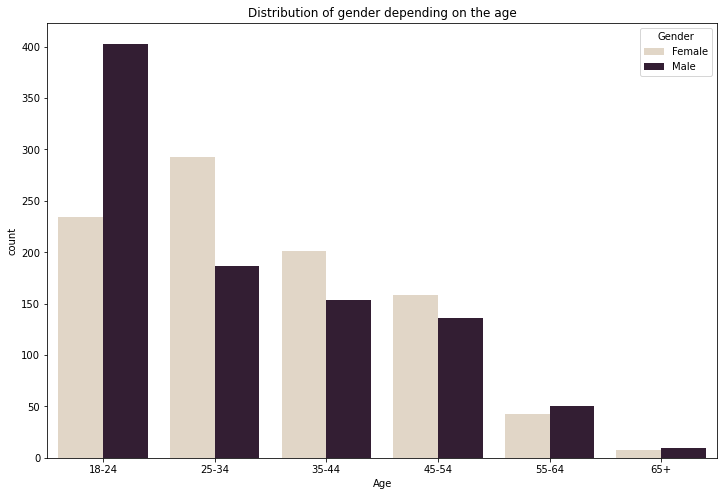

In [147]:
plt.figure(figsize = (12,8))
plt.title("Distribution of gender depending on the age")
sns.countplot(x='Age', hue='Gender', palette='ch:.25', data=drugs.sort_values(by=['Age']));

***Findings:*** Men predominate in the age group 18-24.

In the remaining groups, as the age increases, the gender distribution gradually becomes even.

## Inspect drug use and Education

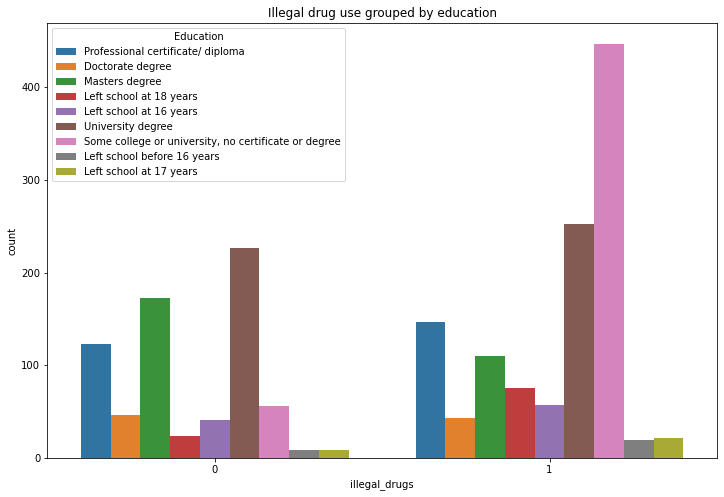

In [149]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Illegal drug use grouped by education")
sns.countplot(drugs.illegal_drugs, hue=drugs["Education"]);

***Findings:*** The group, which uses illegal drugs the most, is the group of ```people, who went to a college or university, but didn't graduate```. They are followed by ```people with a university degree``` and ```people with a professional diploma```.

*We can conclude from this, that education doesn't save you from taking drugs, it seems like it is quite the opposite way.*

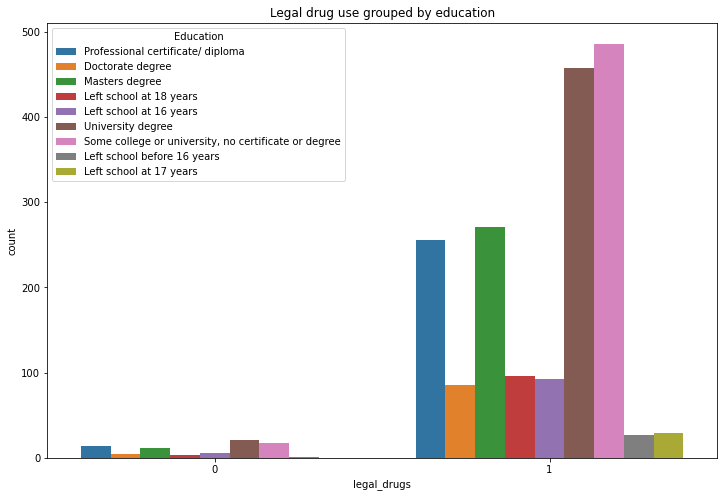

In [113]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Legal drug use grouped by education")
sns.countplot(drugs.legal_drugs, hue=drugs["Education"]);

***Findings:*** The group, which uses illegal drugs the most, is the group of ```people, who went to a college or university, but didn't graduate```. They are followed by ```people with a university degree``` , ```people with a masters degree``` and ```people with a professional diploma```.

*We can conclude from this, that education again doesn't save you from taking drugs, it seems like it is quite the opposite way.*

#### Alcohol and Education

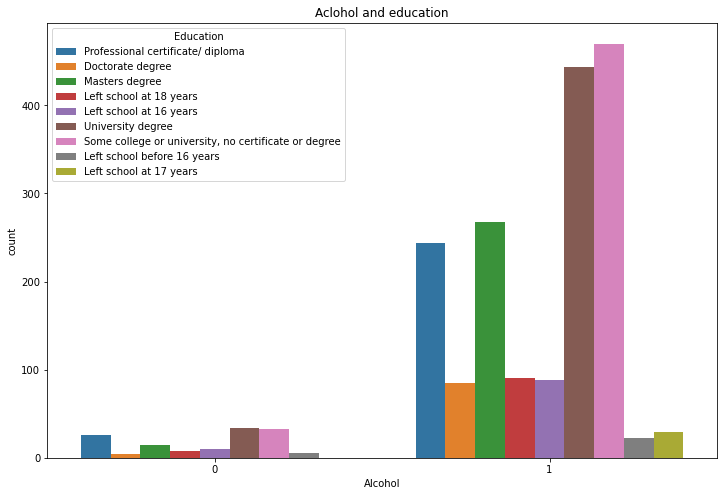

In [114]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Aclohol and education")
sns.countplot(drugs.Alcohol, hue=drugs["Education"]);

***Findings:*** The group, which uses alcohol the most, is the group of ```people, who went to a college or university, but didn't graduate```. They are followed by ```people with a university degree``` , ```people with a masters degree``` and ```people with a professional diploma```.

*No major differences in comparison to legal drugs and education*

#### Nicotine and Education

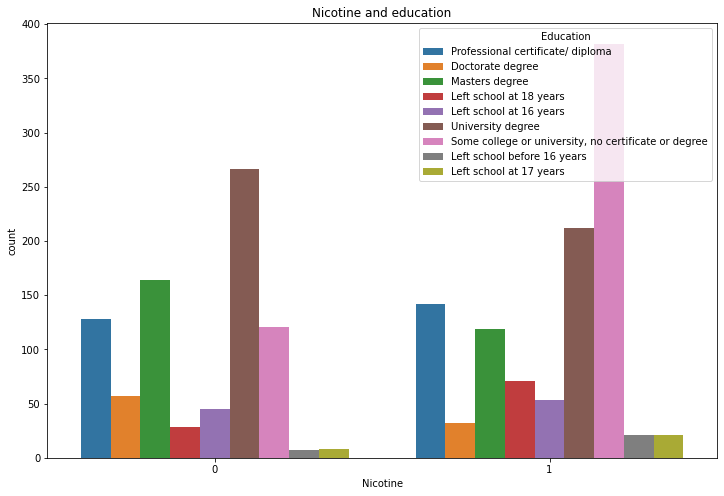

In [115]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Nicotine and education")
sns.countplot(drugs.Nicotine, hue=drugs["Education"]);

***Findings:*** The groups, which consume nicotine, don't differ significantly from the alcohol groups. But there is a difference regarding the number of people, who don't consume nicotine. Here, the number is quite higher in comparison to alcohol.



#### Cannabis and Education

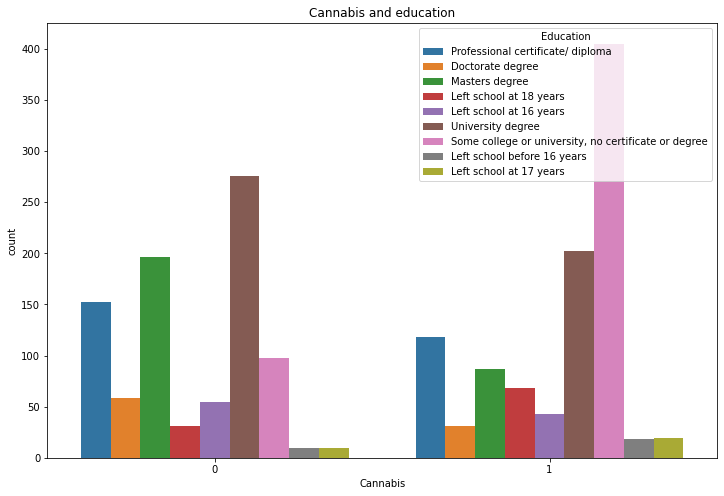

In [116]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Cannabis and education")
sns.countplot(drugs.Cannabis, hue=drugs["Education"]);

***Findings:*** Same as for Nicotine

## Inspect drug use and Gender

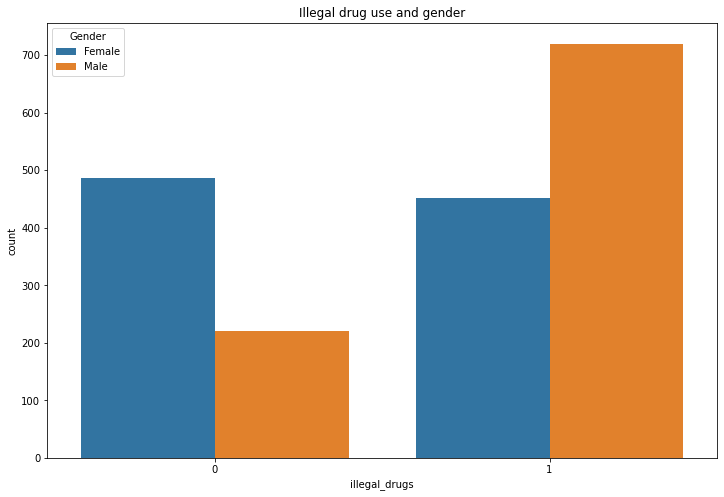

In [118]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Illegal drug use and gender")
sns.countplot(drugs.illegal_drugs, hue=drugs["Gender"]);

***Findings:*** Males use illegal drugs more often.

*We can conclude from this, that the gender plays a role when it comes to the use of illegal drugs.*

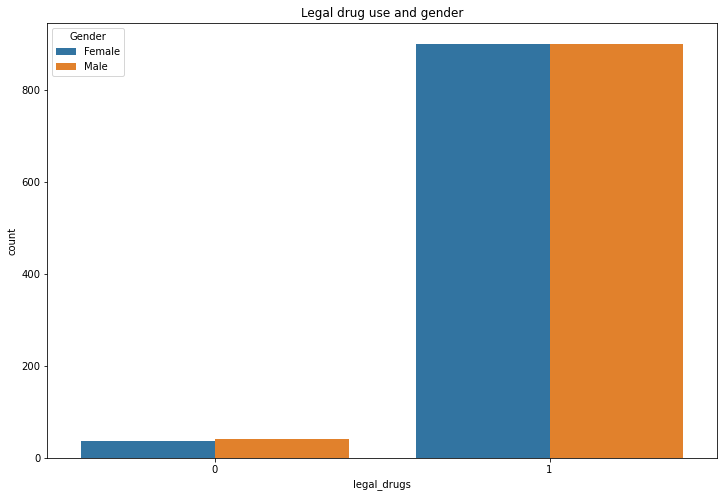

In [120]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Legal drug use and gender")
sns.countplot(drugs.legal_drugs, hue=drugs["Gender"]);

***Findings:*** Concerning legal drugs, there seem to be no gender differences.

*We can conclude from this, that the gender doesn't play a role when it comes to the use of legal drugs.*

## Inspect drug use and Age

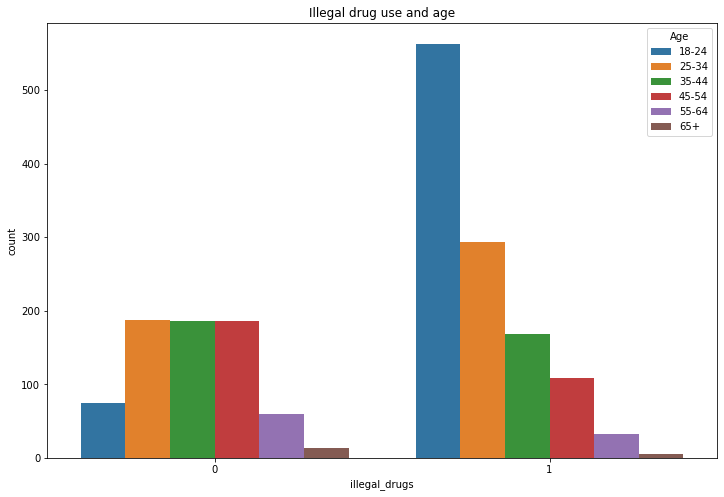

In [152]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Illegal drug use and age")
sns.countplot(drugs.illegal_drugs, hue=drugs["Age"].sort_values());

***Findings:*** The group of ```18-24``` year old people by far illegal use drugs most often, followed by the group of ```25-34``` and ```35-44```.

*We can conclude from this, that the younger the people, the more drugs they use.*

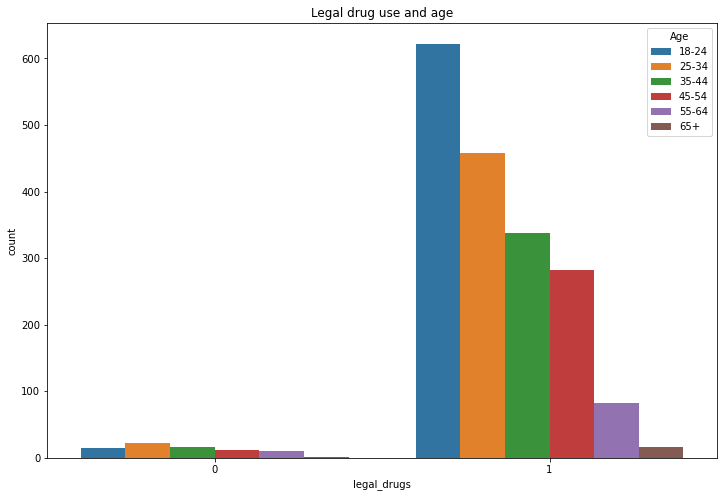

In [151]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Legal drug use and age")
sns.countplot(drugs.legal_drugs, hue=drugs["Age"].sort_values());

***Findings:*** The group of ```18-24``` year old people by far legal use drugs most often, followed by the group of ```25-34``` and ```35-44```.

*We can conclude from this, that the younger the people, the more drugs they use. A difference compared to illegal drugs is, that less people don't consume legal drugs than illegal drugs* 

### Correlations between drugs

In [49]:
drugs_only = drugs.iloc[:, 14:30]

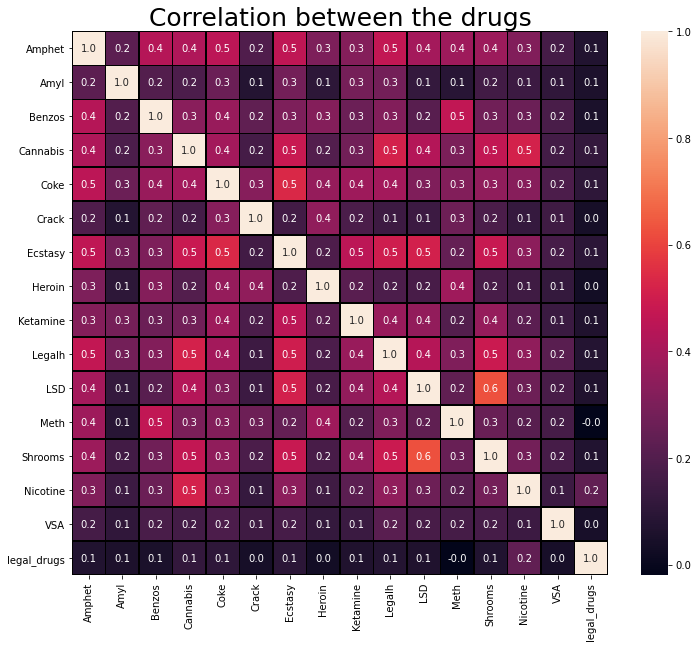

In [50]:
plt.subplots(figsize=(12,10))
sns.heatmap(drugs_only.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Correlation between the drugs",fontsize=25)
plt.show()

```Alcohol``` and ```VSA``` have the lowest correlations by far. ```Cannabis``` and ```Ecstasy``` have most correlations of 0.5 or above. Hghest correlation con be found between ```Shrooms and LSD``` 

## Create a young data set

***Let's take a look at our target group***

In [51]:
drugs_young = drugs.query("Age == '18-24'")

In [52]:
top_5_drugs = drugs_young.iloc[:, 13:29].sum().sort_values()[::-1][:6]
top_5_drugs.tolist()
print(top_5_drugs)

Alcohol     611
Cannabis    530
Nicotine    481
Legalh      358
Ecstasy     321
Shrooms     285
dtype: int64


## Distribution of target feature

### For all age groups

***Illegal Drugs***

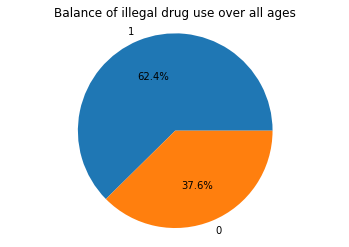

In [123]:
plt.pie(drugs.illegal_drugs.value_counts(),labels=["1", "0"], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Balance of illegal drug use over all ages")
plt.show()

In [54]:
drugs.illegal_drugs.value_counts()

1    1171
0     706
Name: illegal_drugs, dtype: int64

***Findings:*** The use of illegal drugs over all groups of ages is imbalanced, but in a acceptable way though.

***Legal Drugs***

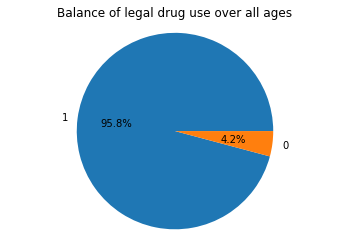

In [124]:
plt.pie(drugs.legal_drugs.value_counts(),labels=["1", "0"], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Balance of legal drug use over all ages")
plt.show()

***Findings:*** The use of legal drugs over all groups of ages is highly imbalanced.

#### For young people

***Illegal Drugs***

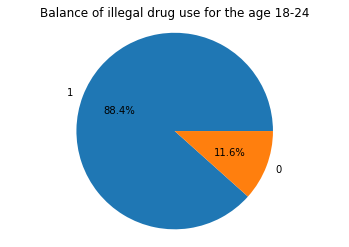

In [125]:
plt.pie(drugs_young.illegal_drugs.value_counts(),labels=["1", "0"], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Balance of illegal drug use for the age 18-24")
plt.show()

***Findings:*** In comparison to all groups of ages, the use of illegal drugs for young people is much more imbalanced. For the modelling part it means, that it would be better to use all ages due to better balance of the target feature.

***Legal drugs***

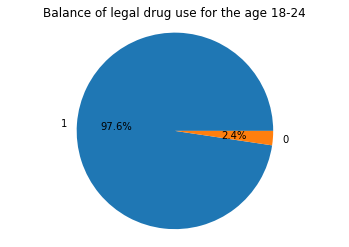

In [126]:
plt.pie(drugs_young.legal_drugs.value_counts(),labels=["1", "0"], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Balance of legal drug use for the age 18-24")
plt.show()

***Findings:*** Highly inbalanced

## Comparison of educational background and the most often consumed drugs

Spliiting in a higher and lower educated data set

In [127]:
drugs_high_edu = drugs.query("Education == 'University degree' \
                            or Education == 'Masters degree' \
                            or Education == 'Professional certificate/ diploma'\
                            or Education == 'Doctorate degree'")

drugs_low_edu = drugs.query("Education != 'University degree' \
                            and Education != 'Masters degree' \
                            and Education != 'Professional certificate/ diploma'\
                            and Education != 'Doctorate degree'")

Finding the top 5 drugs for both groups

In [105]:
top_5_drugs_high_edu = drugs_high_edu.iloc[:, 13:29].sum().sort_values()[::-1][:6]
top_5_drugs_high_edu = top_5_drugs_high_edu.to_frame()
top_5_drugs_high_edu = top_5_drugs_high_edu.rename(columns={0:"Counts"})

top_5_drugs_low_edu = drugs_low_edu.iloc[:, 13:29].sum().sort_values()[::-1][:6]
top_5_drugs_low_edu = top_5_drugs_low_edu.to_frame()
top_5_drugs_low_edu = top_5_drugs_low_edu.rename(columns={0:"Counts"})

Plotting the differences

In [86]:
drugs_list_low = ["Alcohol", "Cannabis", "Nicotine", "Legalh", "Ecstasy", "Benzos"]
drugs_values_low = [701, 553, 548, 346, 300, 291]

drugs_list_high = ["Alcohol", "Nicotine", "Cannabis", "Benzos", "Legalh", "Ecstasy"]
drugs_values_high = [1041, 505, 438, 241, 215, 213]

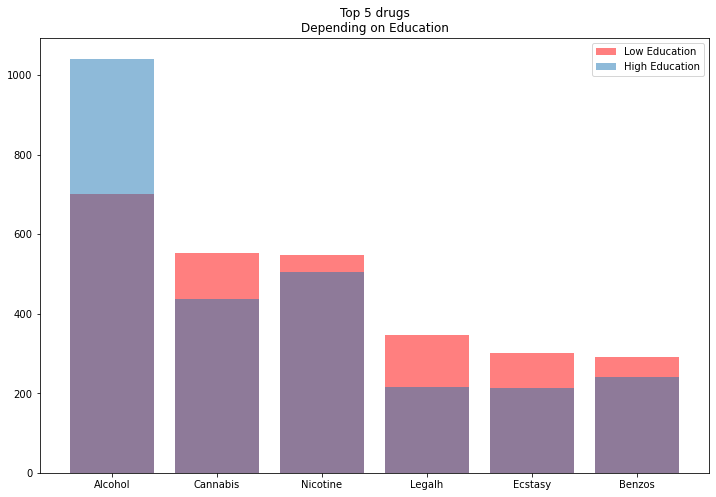

In [109]:
plt.figure(figsize = (12,8))
fig1 = plt.bar(drugs_list_low, drugs_values_low, alpha=0.5, color="red", label="Low Education");

fig2 = plt.bar(drugs_list_high, drugs_values_high, alpha=0.5, label="High Education");

plt.legend();

plt.title('Top 5 drugs\nDepending on Education');

***Findings:*** The top 5 consumed drugs don't differ between the two groups, but the order is slightly different.

For both groups, ```alcohol``` is the most consumed drug. For the lower educated group, ```Cannabis``` is on the second place, whereas ```Nicotin``` takes the second place for the hihger educated persons.

```low educated = ["Alcohol", "Cannabis", "Nicotine", "Legalh", "Ecstasy", "Benzos"]```

```highly educated = ["Alcohol", "Nicotine", "Cannabis", "Benzos", "Legalh", "Ecstasy"]```

*We can conclude that there seem to be differences in the drugs consumed depending on the educational background. On the other hand, these differences concern only the order of the drugs used.*

## Inspect the personaltiy traits regarding age differences

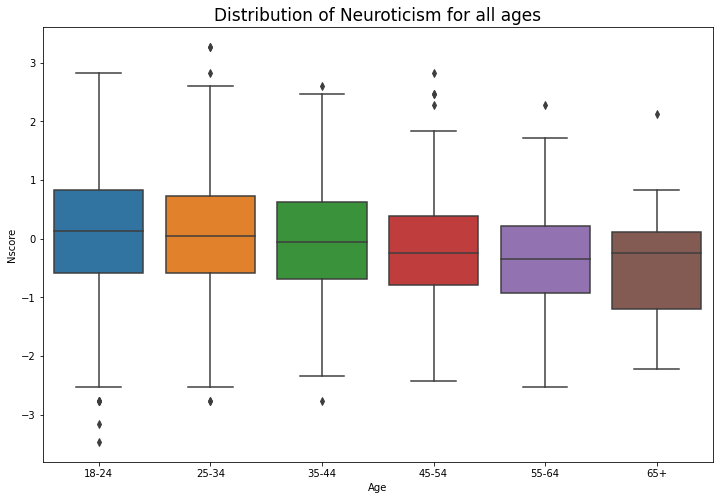

In [138]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of Neuroticism for all ages", fontsize=17)

sns.boxplot(x='Age', y='Nscore', data=drugs.sort_values("Age"));

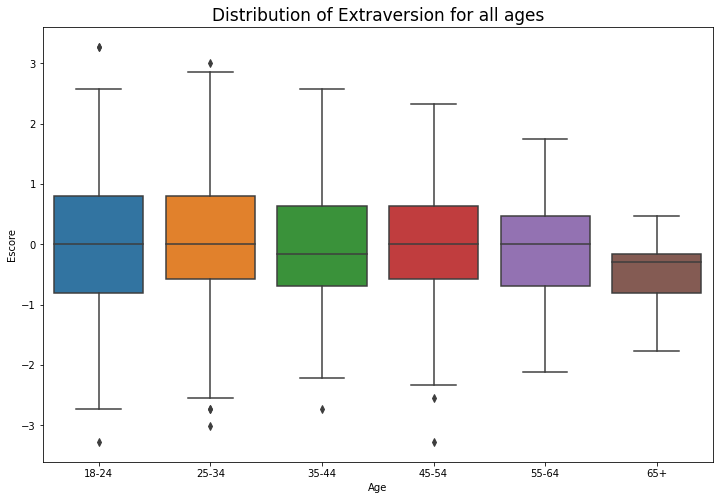

In [137]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of Extraversion for all ages", fontsize=17)

sns.boxplot(x='Age', y='Escore', data=drugs.sort_values("Age"));

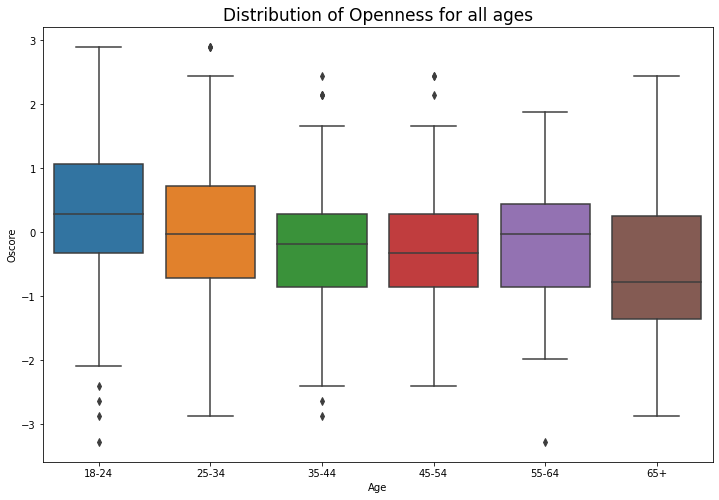

In [136]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of Openness for all ages", fontsize=17)

sns.boxplot(x='Age', y='Oscore', data=drugs.sort_values("Age"));

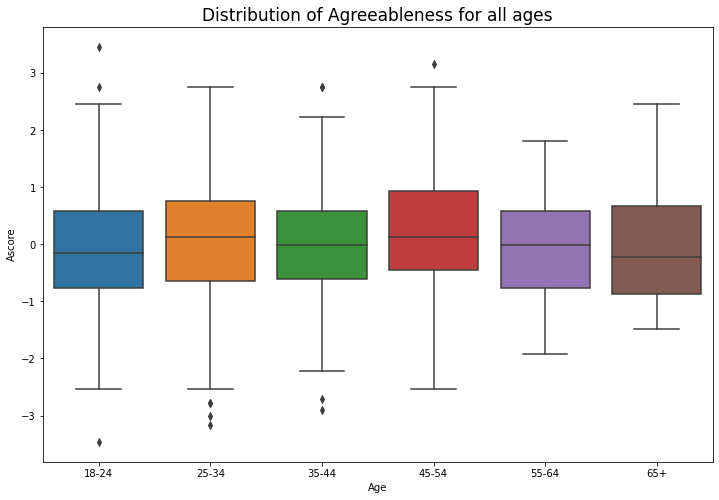

In [141]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of Agreeableness for all ages",  fontsize=17)

sns.boxplot(x='Age', y='Ascore', data=drugs.sort_values("Age"));

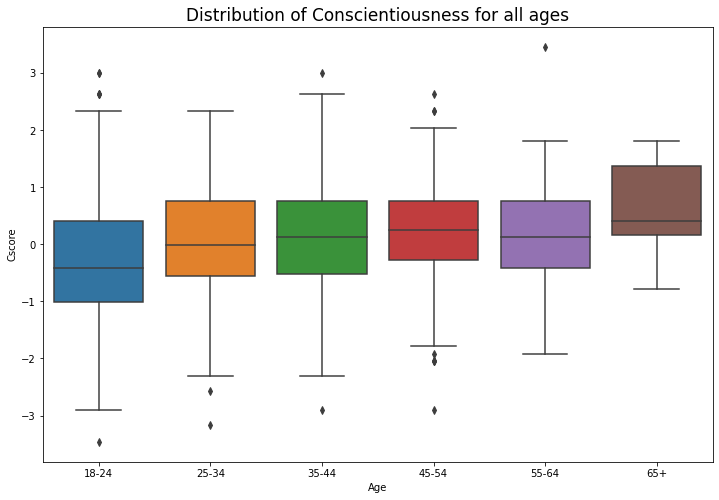

In [142]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of Conscientiousness for all ages",  fontsize=17)

sns.boxplot(x='Age', y='Cscore', data=drugs.sort_values("Age"));

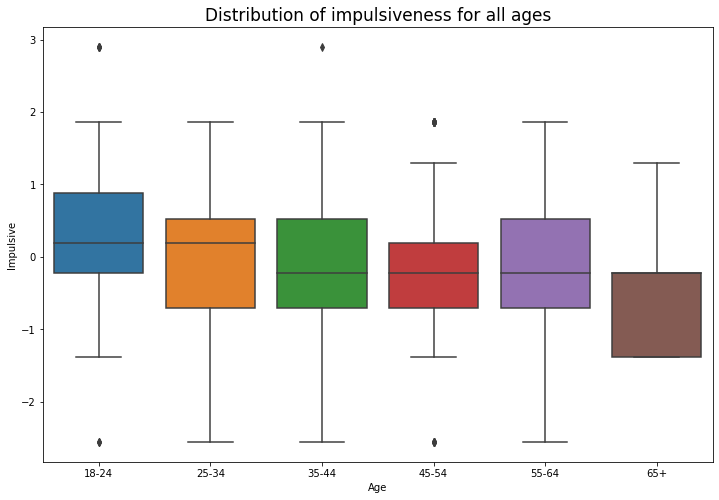

In [143]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of impulsiveness for all ages",  fontsize=17)

sns.boxplot(x='Age', y='Impulsive', data=drugs.sort_values("Age"));

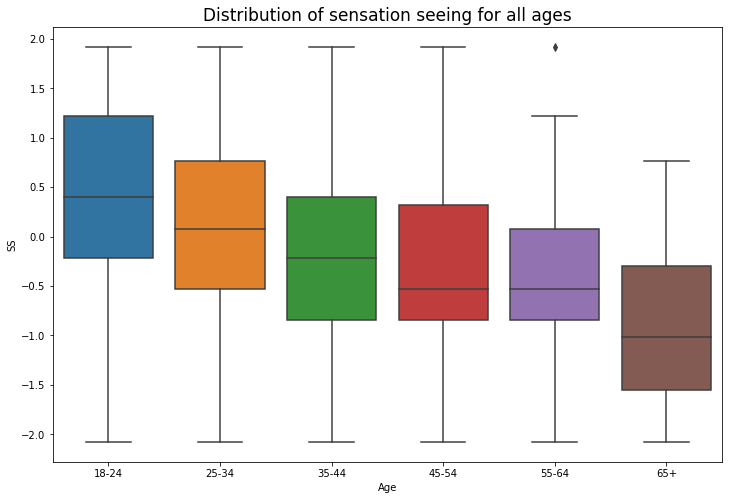

In [144]:
warnings.filterwarnings('ignore')

plt.figure(figsize = (12,8))
plt.title("Distribution of sensation seeing for all ages",  fontsize=17)

sns.boxplot(x='Age', y='SS', data=drugs.sort_values("Age"));

***Findings:*** For ```impulsivness``` and ```sensation seeking``` a high imbalance was found. This will have implications on our use case and the modelling. A possibility could be, to remove the ```65+``` group due to high differences to our target group. There are only 18 persons in this group.